In [1]:
# importing the required lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df=pd.read_csv('/content/drive/MyDrive/datasets/Titanic-Dataset.csv')

In [5]:
# Shape
df.shape

(891, 12)

In [6]:
# Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Few conclusions

 1. Missing values in Age, Cabin and Embarked columns
 2. More than 70 percent values are missing in cabin columns, will have to drop
 3. Few columns have inappropriate data types

In [10]:
# Dropping cabin column

df.drop(columns=['Cabin'],inplace=True)

In [11]:
# Imputing missing values for age
# Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-11-469df478e40e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [12]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'].fillna('S', inplace=True)

<ipython-input-12-647ac518be7e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [13]:
# Want to check one more thing...

# Should I change the SibSp and Parch to categories

df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
df['Parch'].value_counts()

In [14]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [16]:
# Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 62 people died in the accident


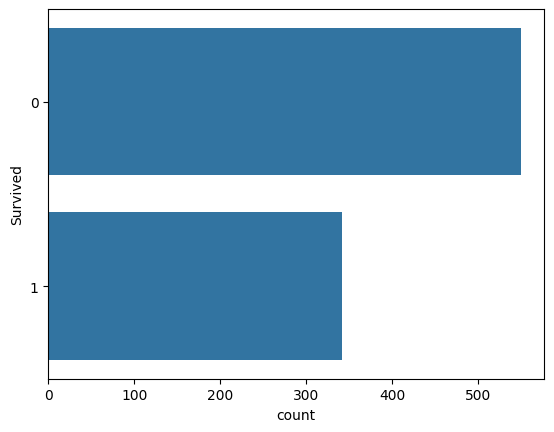

In [17]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Pclass'>

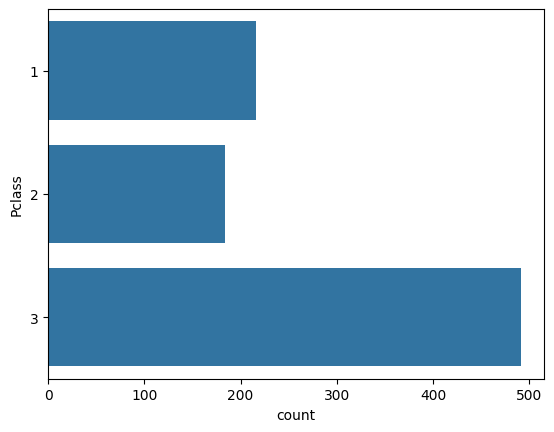

In [18]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(df['Pclass'])

# Conclusion : Pclass was the most crowded class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Sex'>

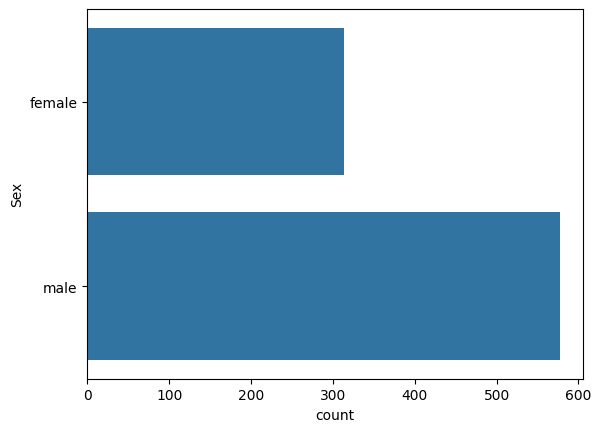

In [19]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(df['Sex'])

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: ylabel='count'>

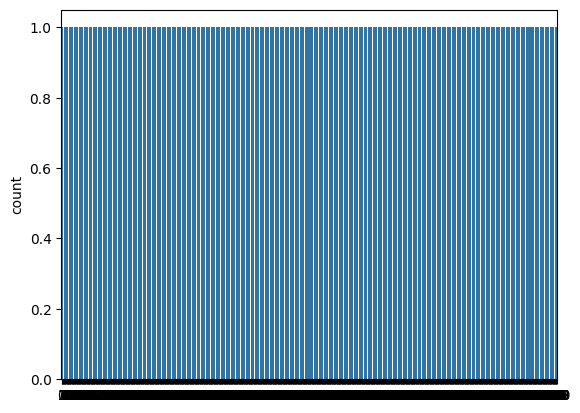

In [20]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: ylabel='count'>

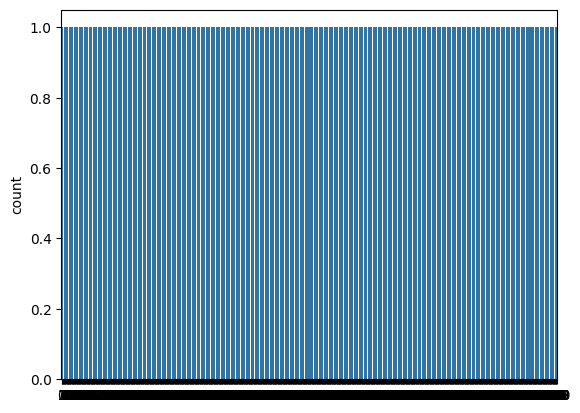

In [23]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(df['Parch'])

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Embarked'>

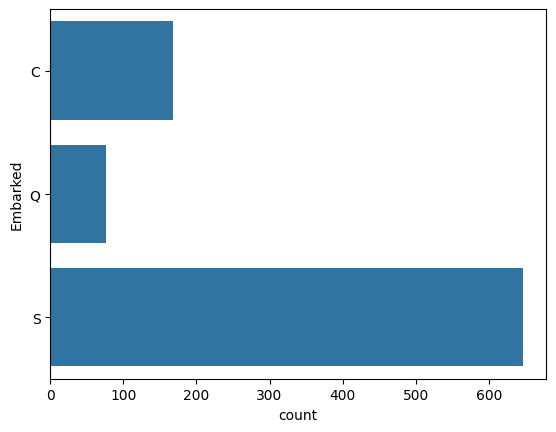

In [22]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(df['Embarked'])

<ipython-input-24-ce823ca53eb8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


0.45956263424701577
0.9865867453652877


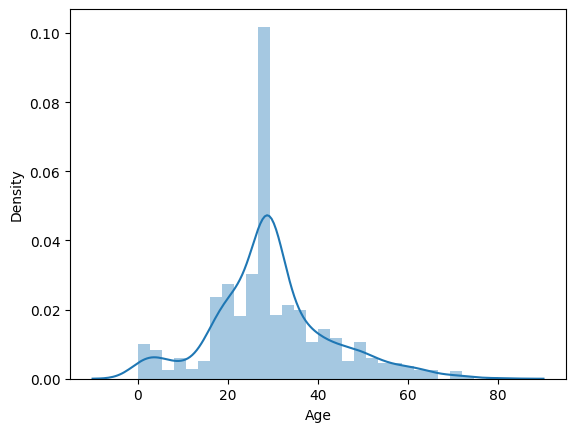

In [24]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

<Axes: ylabel='Age'>

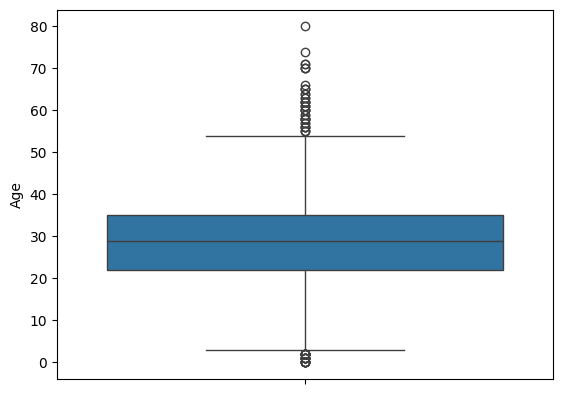

In [25]:
sns.boxplot(df['Age'])

In [26]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


<ipython-input-27-3001b72f0dd7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

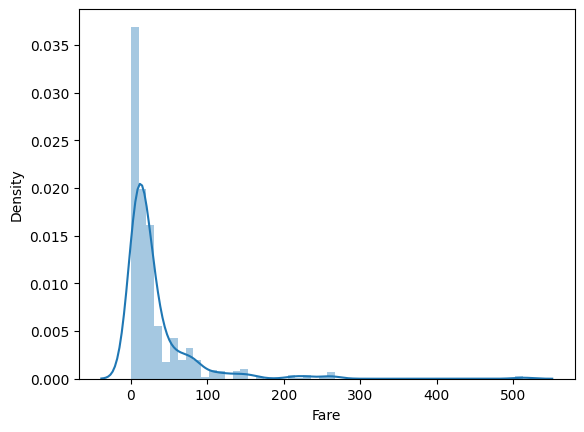

In [27]:
# Fare column

sns.distplot(df['Fare'])

In [28]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<Axes: ylabel='Fare'>

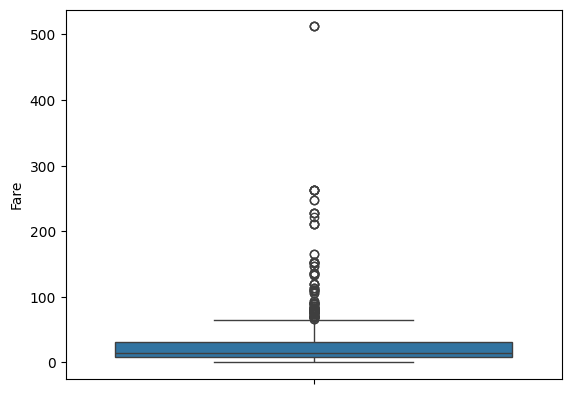

In [29]:
sns.boxplot(df['Fare'])

In [30]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9


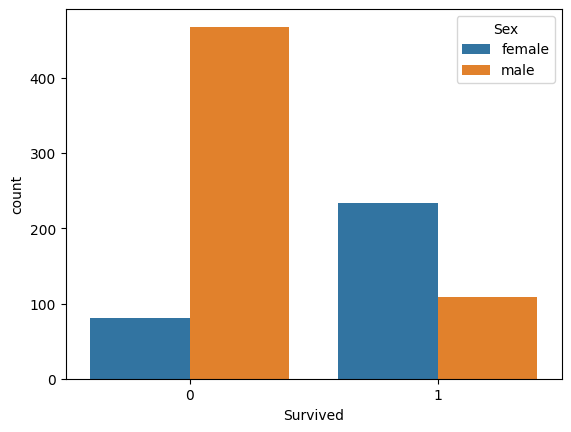

In [36]:

# Survival with Sex

# Correcting the countplot call
sns.countplot(data=df, x='Survived', hue='Sex')

# Creating a crosstab and calculating percentages
survival_rate_by_sex = pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

# Display the survival rates
print(survival_rate_by_sex)

Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.1  33.9


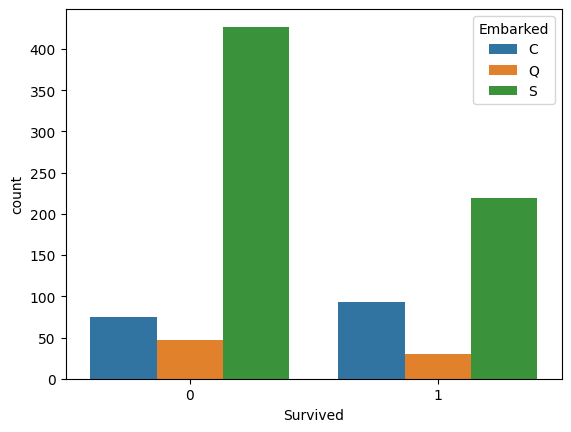

In [37]:
# Survival with Embarked

# Correcting the countplot call
sns.countplot(data=df, x='Survived', hue='Embarked')

# Creating a crosstab and calculating percentages
survival_rate_by_embarked = pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

# Display the survival rates
print(survival_rate_by_embarked)

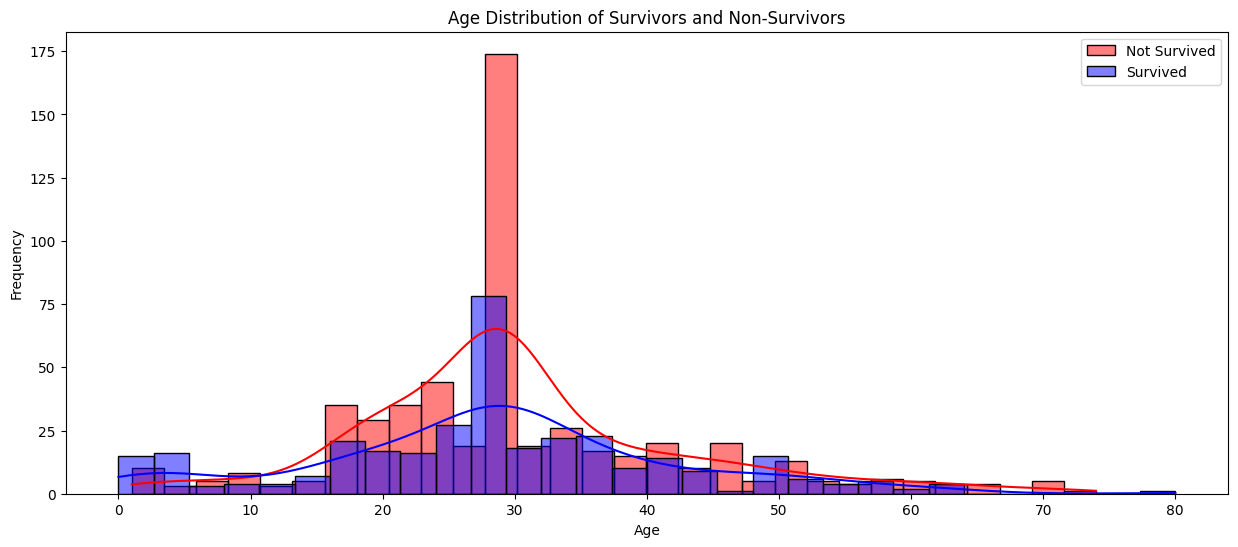

In [38]:
# Survived with Age

plt.figure(figsize=(15, 6))

# Plotting the distribution of Age for non-survivors
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived', bins=30)

# Plotting the distribution of Age for survivors
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='blue', label='Survived', bins=30)

# Adding labels and title
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

<ipython-input-39-eeee0928512b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
<ipython-input-39-eeee0928512b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

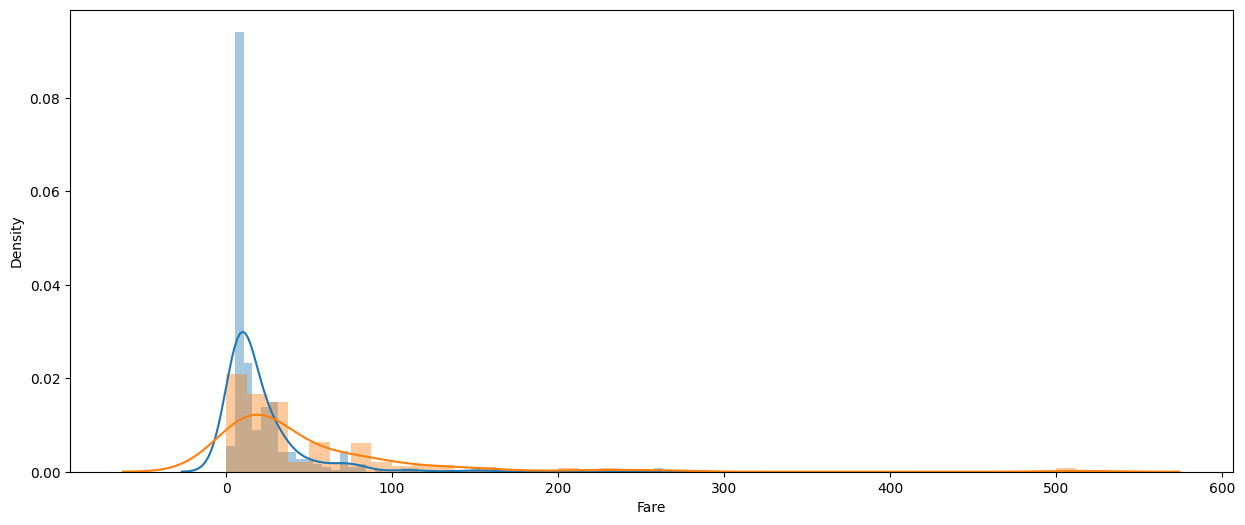

In [39]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

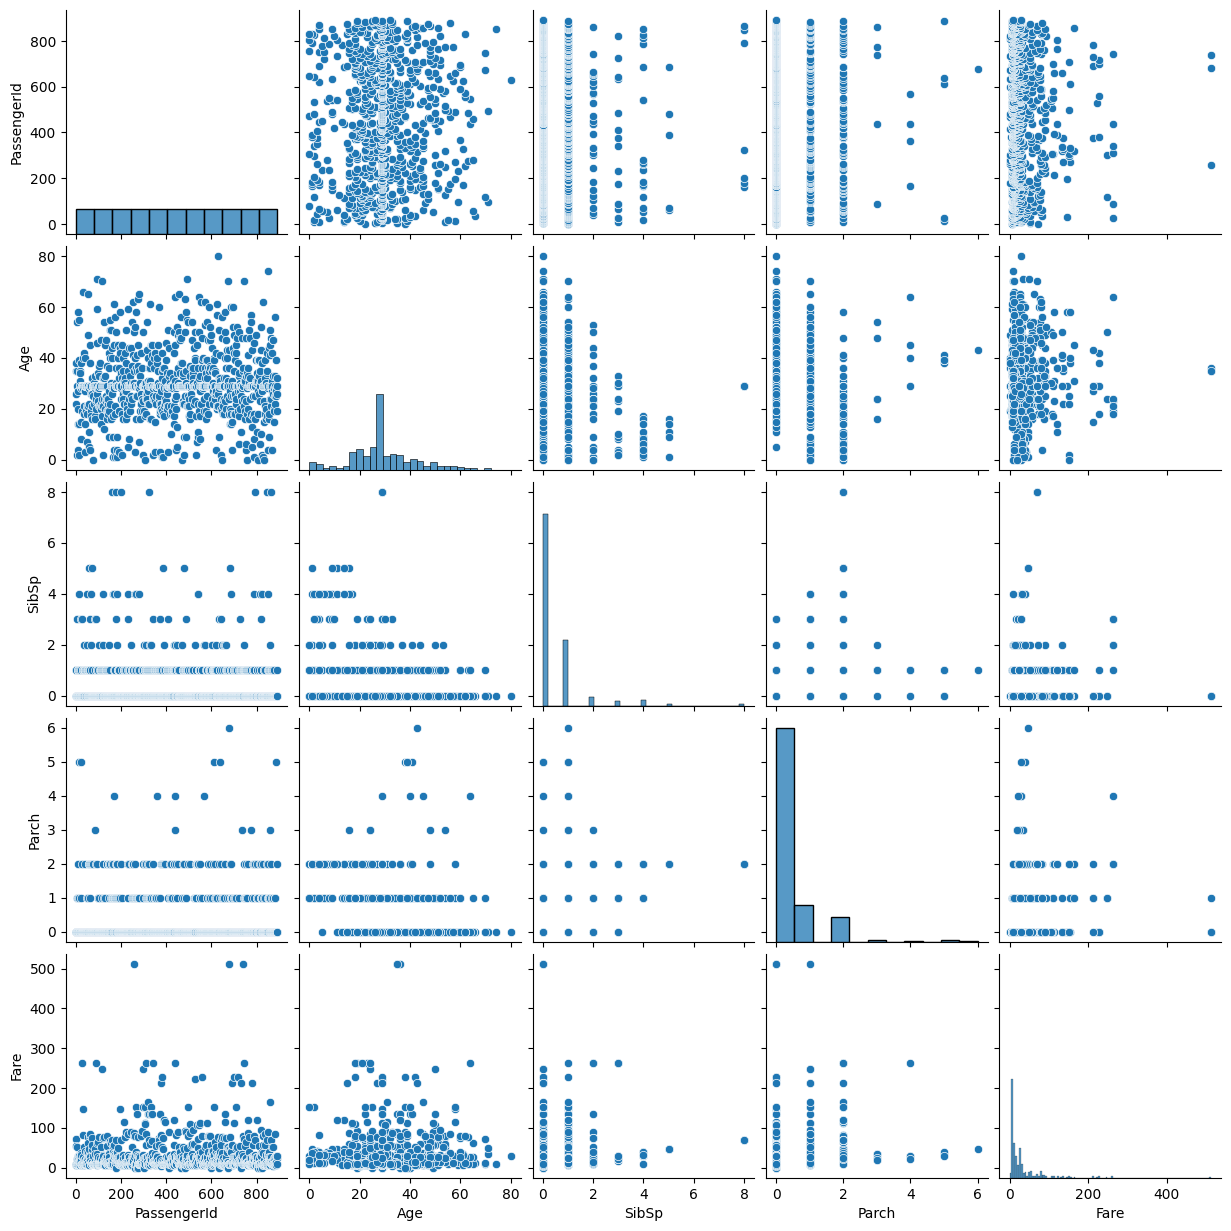

In [40]:
sns.pairplot(df)

# Feature Engineering

In [42]:
# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [43]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,29,0,0,370370,7.7500,Q,0
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37,1,0,113803,53.1000,S,1
698,699,0,1,"Thayer, Mr. John Borland",male,49,1,1,17421,110.8833,C,2
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70,0,0,C.A. 24580,10.5000,S,0
783,784,0,3,"Johnston, Mr. Andrew G",male,29,1,2,W./C. 6607,23.4500,S,3


In [44]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [45]:
df['family_type']=df['family_size'].apply(family_type)

In [46]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20,0,0,A/5 21173,7.250,S,0,Alone
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28,0,0,345770,9.500,S,0,Alone
659,660,0,1,"Newell, Mr. Arthur Webster",male,58,0,2,35273,113.275,C,2,Medium
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21,0,0,A/4. 39886,7.800,S,0,Alone
802,803,1,1,"Carter, Master. William Thornton II",male,11,1,2,113760,120.000,S,3,Medium


In [47]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [48]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
442,443,0,3,"Petterson, Mr. Johan Emil",male,25,347076,7.7750,S,Medium
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,LINE,0.0000,S,Alone
223,224,0,3,"Nenkoff, Mr. Christo",male,29,349234,7.8958,S,Alone
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29,C.A. 29395,10.5000,S,Alone
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,29,113767,50.0000,S,Alone


In [50]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


In [51]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [52]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [53]:
# One hot encoding

df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False


In [54]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

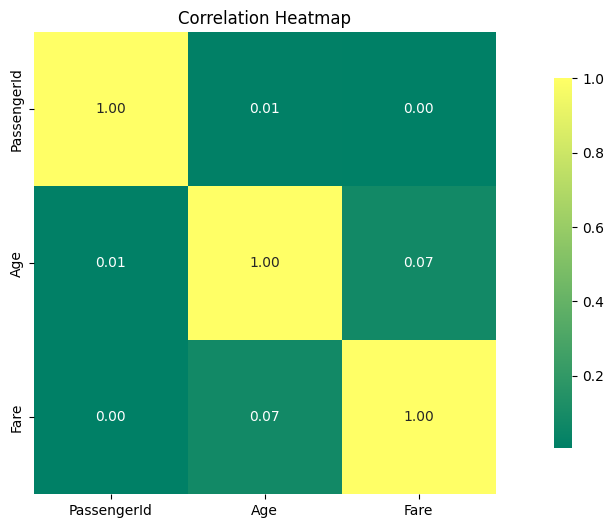

In [56]:
numeric_df = df.select_dtypes(include=['number'])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 6))
sns.heatmap(numeric_df.corr(), cmap='summer', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Adding title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()